by Albina Chowdury, Cesar Cisneros, Estelle Hooper, Eva Ruse

# I. Research Question
#### Is there a relationship between how happy a country is and the music the people of this country listen to?

**Table of Contents:**

1. [Introduction](#introduction)
2. [Data Description](#dd)
2. [Preregistration Statements](#pre)
3. [Data Analysis – Evaluation of Significance](#da1)
4. [Data Analysis – Interpretations and Conclusions](#da2)
5. [Limitations](#lims)
6. [Data Collection and Cleaning](#collection)
7. [Exploratory Analysis ](./Exploratory_analysis.ipynb)
8. [Training a model to predict happiness scores in 2020](#training)
9. [Sources](#sources)
10.[Turn Up the Music](#Turn-Up-the-Music!)

### Introduction: What measures happiness? Music or life expectancy?<a name="introduction"></a>
Music is widely used to cope with any mood by most individuals across the world. Spotify has taken advantage of music as therapy, generating several playlists related to emotion, such as [Mood Booster](https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0?si=1ac560999d7f4489) to "get happy" and [Life Sucks](https://open.spotify.com/playlist/37i9dQZF1DX3YSRoSdA634?si=ce50da9a976e41d9) for when you feel like "everything in life sucks." In fact, for every song on Spotify, Spotify has calculated individual scores to measure the "mood" of the song (danceability, valence, energy, tempo).

According to the Sustainable Development Solutions Network (SDSN, an initiative launched by the United Nations), a *country's* happiness can be calculated by economic production , life expectancy, freedom, and more. Though the music the people of said country listen to is obviously not one of these factors, we are more interested in discovering if there are any notable differences between popular music in "happy" countries and in "sad" countries.

In our project, we will test the worthiness of these Spotify-generated scores related to happiness and explore any biases in Spotify's playlist creation algorithm. For example, according to the SDSN, the happiest country in 2020 is Finland, but the top-streamed songs in Finland are absent in Spotify's playlists to encourage happiness (eg [Mood Booster](https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0?si=1ac560999d7f4489)). 

Of course, the results are not to assert that happy playlists should only include popular songs of happy countries, but to initiate conversation on the inclusivity of Spotify's selections and question the validity of how powerful organizations (such as Spotify and the SDSN) quantify happiness.

With more than 155 million [(as of 2020)](https://www.statista.com/statistics/244995/number-of-paying-spotify-subscribers/#:~:text=How%20many%20paid%20subscribers%20does,than%20doubled%20since%20early%202017.) **paid** listeners, it is imperative that Spotify provide its them with user-centered content. 

Summary:

Guided by the findings of a Harvard study asserting that the human brain is "hard-wired" to distinguish music from noise and to respond to rhythm and repetition, "tones, and tunes," we felt inspired to observe whether happy countries (as determined by the world happiness report) listen to happy music and the opposite with less happiest countries (Harvard Medical School). In particular, it is not uncommon to observe certain music genres as having more influence in the United States, despite American-born artists having great influence overseas. Genres like K-Pop and Reggaeton have gained mainstream popularity in the U.S., and are often associated with "happier" settings. There are interesting relationships that can also be observed with respect to countries that rank low on the happiness index yet have great influence with their music (e.g., The Dominican Republic and Honduras). 


#### The datasets we will be using:

All the datasets were found on Kaggle.
<br>
1. ["World Happiness Report 2019"](https://www.kaggle.com/unsdsn/world-happiness) by Sustainable Development Solutions Network
<br>
The Sustainable Development Solutions Network ranks 155 countries by their happiness levels, and calculates a "happiness score" for each country using six factors: economic production, social support, life expectancy, freedom, absence of corruption, and generosity. This dataset is for the year 2017.
2. ["Spotify's Worldwide Daily Song Ranking"](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking) by Kaggle user
<br>
For each country in 54 countries, this dataset provides the top 200 songs per day in the year of 2017 (January 1, 2017 to January 9, 2018). 
- *Note: the Kaggle description says 53 countries, but we found 54 countries. Perhaps the description was not updated when the dataset was.*
3. ["Spotify Web API"](https://developer.spotify.com/documentation/web-api/reference/) 
<br>
This dataset contains contains characteristics of songs on Spotify. Spotify calculates and gives scores for their songs. Some of these values include scores for danceability, beats per minute (bpm), and liveness (the likeliness that the song is a live recording).
4. ["World Happiness Report 2020](https://www.kaggle.com/londeen/world-happiness-report-2020?select=WHR20_DataForFigure2.1.csv) by Michael Londeen (Kaggle User, adapted from Sustainable Development Solutions Network)

# II Data Description <a name="dd"></a>
We used four datasets for this project. One was a Kaggle dataset that compiled the happiness scores and happiness ranks for countries in 2019 and then we also used a similar dataset that compiled these scores and ranks for countries in 2020. The other two datsets we used pertained to Spotify data; we created these datasets by webscraping the Spotify Charts website. One dataset included the top 50 songs per country in 2019 and the other dataset included the top 50 songs per country in 2020. 

**World Happiness Report Dataset**<br>
<br>The happiness score dataset’s rows are the countries that were included in the Gallup World Poll; its columns are country, happiness score, happiness rank, GDP per capita, family, life expectancy, freedom, generosity, government corruption, and dystopia residual. Factors such as GDP per capita, freedom, etc. are used to compute a country’s happiness score, and then their rank once their score is viewed in relation to other countries. <br>
<br>Much of the data for the world happiness reports comes from the Gallup World Poll. This poll conducts randomized telephone or face-to-face interviews depending on the percentage of a country’s population that has a telephone (cite). The world happiness report is usually published by the Sustainable Development Solutions Network, a branch of the United Nations. The Sustainable Development Solutions Network uploaded the data set for 2015-2019 onto Kaggle. We only use the 2017 dataset. According to the Kaggle dataset, the inspiration for this dataset was to discover the answers to questions like, “What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?”, “How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?”,  “Did any country experience a significant increase or decrease in happiness?” (cite). Since this dataset is published by the Sustainable Development Solutions Network, we can assume that the United Nations funded the creation of this dataset – or at least the data within it.<br>
<br>While Gallup has a very thorough methodology when it comes to carrying out the Gallup World Poll there is still the possibility that people are not honest when they answer the question, or that the poll is not reaching a large/diverse enough group. Additionally, the data that is collected through this poll is affected by the type of person who typically responds to polling questions; for example, people who have very strong opinions about the topic are more likely to agree to be polled than those who have weaker opinions. This may skew the responses to the data. <br>
<br>To compile this dataset, the Sustainable Development Solutions Network had to take the data from the world happiness reports (which have separate reports for each year) and append the poll data into the necessary columns for each country. This required the Sustainable Development Solutions Network to pick and choose the data in the actual world happiness report that they believed was important to include in the Kaggle dataset. <br>
<br>The happiness scores are calculated using data that is collected through the Gallup World Poll. The people who answer these questions are aware of the data collection. This is a well-known report that is compiled, however, we are unsure if they are aware of the purpose of the survey.
This is the link to the dataset that was uploaded to Kaggle by the SDSN: https://www.kaggle.com/unsdsn/world-happiness <br>

**Spotify Dataset**<br>
<br> Ultimately, the spotify datasets for 2019 and 2020 incudes data from the happiness datasets. Each row of the dataset corresponds to some top song that a country listened to. The country column contains the name of the country for which the song was a top song. Other columns are `happiness_score`, `happiness_rank`, `date`, `position`, `track_name`, `artist`, `streams`, `danceability`, `energy`, `key`, `loudness`, `mode`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, `id`, and `duration_ms`. Columns such as`happiness_score` and `happiness_rank` come from the Kaggle dataset that we described above. The rest of the columns contain the audio feature data for each song that we got using the Spotify API. We have two datasets that followt this model, one that has the top 50 songs for each country in 2019 and then one that has the top 50 songs for each country in 2020. For each dataset, we look only at the top 10 and bottom 10 happiest countries in that year according to their happiness score provided by the Kaggle dataset.<br>
<br> We initally were going to use a Kaggle dataset that compiled the top 200 songs per country in 2017, however, for our data analysis we wanted to create a training model to test our hypothesis. In order to do this, we needed another year of data so we could test our model on another set of data that it wasn't trained on. After we learned how to scrape data from Spotify Charts, we decided to do the same for 2019 instead of 2017. While we could have scraped the data for 2017, we decided to use 2019's data since we believed that training a model and testing it on datasets that are closer together in age would remove the possibility that changing trends in music would obscure the relationship between a country's happiness and the songs they listen to. Overall, the purpose of creating this dataset was to be able to use it in comparison with countries' happiness scores. No one funded the creation of this dataset. <br>
<br> When webscraping the Spotify Charts website, some countries (particularly countries that had the smallest happiness scores) did not have data listed for every day of the year that we were looking at. Additionally, we only chose to include countries for which we also had their happiness scores for. Lastly, we only chose to look at the top 50 songs instead of the top 200 due to Spotify's limit on calls to their API. <br>
<br> This is the link to the Spotify Charts website, which we used to webscrape the top songs for countries in 2019 and 2020: https://spotifycharts.com/regional
To use the website, you select the region that you want to look at and the day. <br>

# III Pre-registration Statements <a name="pre"></a>

The two analyses that we have chosen to perform in our final project are:

1. What is the relationship between the happiness score of a country and the average danceability score of its top songs over two-week periods for a year?
2. What is the relationship between the happiness score of a country and the average valence score of its top songs over two-week periods for a year?
<br>
**Analysis #1**<br> Does the danceability of a song have any correlation with the happiness score of a country?
For our first analysis, we will be performing the rolling average of two weeks (14 days) for our data frame. In sum, this rolling average will take the average danceability score over 14 days by collecting the 50 songs for this period for the top happiest and bottom happiest countries. In particular, we believe there may be a relationship between those countries that score high in the happiness rank and those countries with songs that have high danceability scores. Danceability is often correlated with happiness, hence we believe the top ten [happiest] countries may exhibit particularly high danceability scores. The goal of our project is to understand whether there is any meaningful relationship between happy countries and the music they listen to. As a result, performing a rolling average of the danceability scores of the top happiest and least happy countries will allow us to observe one dimension of happiness from the lenses of danceability. As stated, we expect to see the top happiest countries (e.g., Finland and Denmark) to have high danceability rolling average scores compared to the least happy countries (e.g., South Africa and Vietnam). 

**Analysis #2** <br>Can we predict the happiness ranking of a country based on Spotify-provided happiness scores (“valence”)?
For every song, the Spotify API provides its own “happiness” score, called “valence.” The higher the valence score, the more positive the mood for the song is. Using these provided happiness scores, we want to compare the valence for popular songs in sad countries and popular songs in happy countries. If happy countries do have higher valence scores than sad ones, we may find a relevant connection between happiness ranks and the valence scores. If sad countries have higher valence scores than happy countries, we may still be able to find a connection between the variables and presume that sad countries may want to listen to happier songs. Even if there is no significant difference between the valence scores between happy and sad countries, we can still analyze the results and conduct more outside research as to why there is no correlation. This may be related to other Spotify-provided scores, such as “danceability”. Some countries, perhaps Hispanic ones, may have dance built into their cultures even though the happiness scores are variable. All in all, we may find that Spotify’s valence score does not accurately indicate happiness.

# IV Data Analysis <a name="da1"></a>

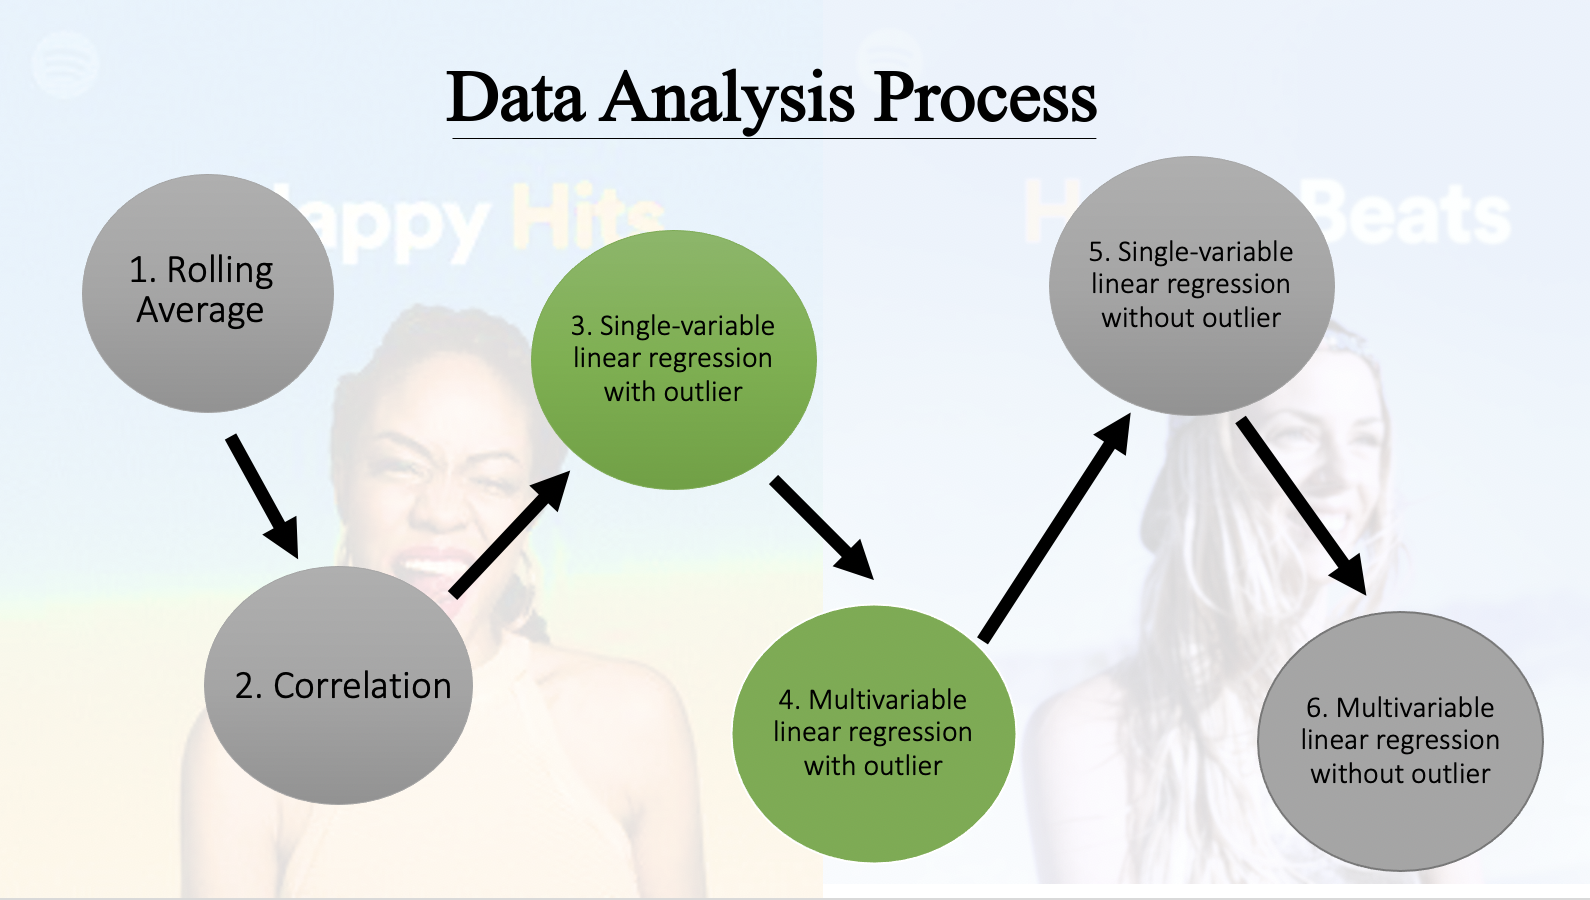

**Evaluation of significance**<br>

We performed a rolling average of two weeks for the songs of the top and bottom 10 happiest countries to discern any relationships. An assumption we had to make was that fourteen days was sufficient to conclude for the general music patterns observed in these countries, which limits our interpretations to this window. This was done for optimization reasons. As it pertains to our reasoning behind deciding to run a rolling average, we wanted to understand the possibility of there being a relationship between happiness score and individual features over fourteen days. A rolling, or moving, average analyzes data points by creating a series of averages of different subsets of a full data set, which seemed appropriate for our purposes since we were working with a dataset of 20 countries for one year. Although we acknowledge that it would have been more compelling to evaluate a rolling average over a longer period beyond fourteen days, this was impractical given time constraints. We attempted to do this, and the calculation took over four hours; further, the Spotify API – which we are using to obtain all the features for our Spotify songs – could only be run a specific number of times before we got a timing error. Spotify updated its usage terms for its API, hence doing a longer period resulted virtually impossible.

The rolling average results were consistent with our hypothesis, asserting that happier countries listened to music with higher danceability and valence scores. In particular, the line of best fit was steeper for top countries, and its distribution of country rolling averages of danceability and valence scores started at a higher score than the bottom countries. By the same token, the distribution of the bottom countries was scattered below the valence distribution of the top countries, which means that top countries were scoring relatively higher in valence score than the bottom countries. Most compellingly, we observed an outlier with the Dominican Republic as one of our bottom happy countries, which unexpectedly ranked extraordinarily high for its danceability and valence score. In fact, it was the highest valence and danceability score out of all 20 countries in this dataset. We understood this extreme outlier likely influenced our interpretation results of significance, so we resorted to performing the correlation of these rolling averages to see which features were correlated and better for further analysis.

We noticed that the happiness score had a relatively weak (near zero) correlation with valence and danceability – our two main analysis features – so we proceeded to do a single-variable linear regression model to predict happiness score for 2020 (including all individual features). Given that the Dominican Republic resulted in an extreme outlier, we felt it was appropiate to run the single-variable linear regression without the Dominican Republic, though we did this **after** running our model with the country included. Specifically, we focused on using certain features (danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration_ms) as our predictor variables and our happiness score as our outcome variable. Doing a linear regression model was appropriate for our model because we had already done the correlation of some of these features and happiness score, which all resulted in insignificant results. Therefore, modeling the relationship between happiness score and these features seemed most adequate by fitting a linear equation to the observed data. Our $r^2$ values were negative for all features, which indicates that our model using these features is a bad predictor of happiness score. "Bad" in our context means these features are virtually trivial to predict what kind of music a country listens to. It is worth noting these features included danceability and valence.

With this in mind, we understood individual features were not particularly helpful to predict the happiness score of countries from 2020, so we felt compelled to try a multivariable linear regression model to observe how impactful all the [aforementioned] features were in predicting 2020 countries' happiness scores. Similarly, all our $r^2$ values were negative, which means our multivariable model was not particularly good at predicting the happiness score of these countries. Specifically, this means features like danceability and valence, among others – together – are not good tools to predict what kind of music a country listens to. It should be noted that we ran a single-variable linear regression model after this multivariable regression model, but without the Dominican Republic included. Similarly, we also ran a multivariable linear regression model without the Dominican Republic. Both of these models resulted in similar results; their $r^2$ were also negative, thereby making our model ineffective to predict happiness scores for 2020.<br>
<br>
**Interpretation and conclusions** <a name="da2"></a>
<br><br>
We predicted a country’s happiness score could be predicted by the type of music the people of that country listen to. Specifically, we thought features like how danceable a song is would ultimately give us more insight into the overall happiness of people from this country – irrespective of social or political factors affecting this score. Following conventional wisdom, we believed features like danceability, valence, instrumentalism, and liveness were representative of happiness. However, our results indicate precisely the opposite, thus making these features unfit for determining a country’s happiness. As such, we can only conclude that the selected features for Spotify are not a good predicting tool for a country’s happiness, as determined by its happiness score.<br>

Without prior knowledge about this potential relationship between a country’s happiness and these Spotify features, analysts could potentially predict a country’s general happiness using features like liveness and danceability. This can be seen as a useful metric for this purpose, given the ability of music to uplift or distress people, which would be generalized to the entire population of certain countries. In particular, we often associate music with mood, given the ability of music to stimulate certain emotions or sensations. A prediction of this sort would theoretically impulse policy-makers – or anyone striving for the overall well-being of a given country – to implement measures and activities using music. Countries ranking low on their happiness score would attempt to assimilate to the music followings of higher-ranking countries on their happiness score. As it relates, pursuing a goal like this is not indicative of a country’s happiness and will likely produce a negligible effect on the country’s happiness. 
<br><br>
Notwithstanding, there may be positive outcomes in following through with this approach. Although this would require further research on the subject matter, the exposure to “happy” music – as determined by high scores of danceability, or other similar features – can improve the well-being and emotional state of people.  Indeed, authors writing on behalf of the American Psychological Association studied precisely this relationship in 2010, asserting that “happiness ratings were elevated for fast-tempo and major key-stimuli and sadness ratings were elevated for slow-tempo and minor-key stimuli" (Hunter). A different relationship may be observed in a longer period than 14 weeks, but this would require the use of more developed tools beyond only using the Spotify API, given the constraints it poses.

# V Data Limitations <a name="lims"></a>
When conducting this analysis, our group used only the top ten and bottom ten happiest countries, due to the limit on the number of calls you can make to the Spotify API. This limits our data size because we excluded the rest of the countries that are included within the happiness data. This affects our data by not only limiting it but also excluding countries with different cultures and the trends within that nation. 
<br><br>
Using data from 2019 further limits our data set because it is not up-to-date. We recognize that within our analysis that the cultures of the countries that we selected are not varying significantly, so we assumed that the type of music listened to within the different countries would not differ greatly. 
<br><br>
Using the music platform Spotify in itself for this analysis is another limitation because it excludes the other music platforms that may be more popular in different countries. Spotify is not representative of all music platforms' data on global music streaming.
<br><br>
While attempting to extract information from the Spotify API, our group came across issues with the security of Spotify. When re-running our code, there would be errors yielded which stated that we used our maximum amounts of retries. To mitigate this issue, we had to install a Spotify extension for our use. Additionally, Spotify installed an extra layer of security on their Spotify charts website, which hindered our ability to web-scrape the data for 2020. We were able to get 2020 data; however, some days may be missing for certain countries.  
<br>
Another limitation our group recognized was that music listened to globally became more versatile in that people of different nationalities are listening to international music, due to trends. As different countries listen to other countries' music, it may. steer away from its own popular cultural music, which can affect the data significantly.
<br><br>
Using the rolling average is another limitation within our models. The rolling averages can be include extreme outliers which have the potential of affecting the data by skewing some of the rolling average values. This can potentially obstruct the accuracy of the models we constructed. 
<br><br>
When computing the rolling average for each of the bottom ten and the top ten countries, we used data from only a 14-day period. This limits our data to only 2 weeks of the entire year for each country, instead of the full 365 days. This could have left out potential changes in trends during the course of the days excluded within the year for each of the countries. 
<br><br>
Having extreme outliers is a data limitation because it can lead to skewing of certain values and can also impede on the trends within the graphs of our models. In order to express our group's efforts to make our models as accurate as possible, we created multiple models with and without the outliers --each model was differentiated and labeled-- to display trends both inclusive and exclusive of the outliers. 
<br><br>
When constructing our training model, we used data from 2020, which limits our analysis even further. Given we enetered a new year, and the circumstances of 2020 (i.e., the Novel Coronavirus), our data from the previous years may not be the most accurate model in its predictions because it does not take into account potential outside factors that may impact the data. 

Importing useful packages

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression as lr

### A. Data cleaning for "World Happiness Report"

In [37]:
finalsongs2019=pd.read_csv("spotify2019.csv", index_col=0)
finalsongs2019.dropna(inplace=True)
topbot=pd.read_csv("happy2019.csv",index_col=0)

In [38]:
topbot

,happiness_rank,country,happiness_score
0,1,Finland,7.769
1,2,Denmark,7.600
2,3,Norway,7.554
3,4,Iceland,7.494
4,5,Netherlands,7.488
5,6,Switzerland,7.480
6,7,Sweden,7.343
7,8,New Zealand,7.307
8,9,Canada,7.278
9,10,Austria,7.246


# VII Exploratory Data Analysis <a name="exploratory"></a>

Using the data that we scraped and cleaned from the top Spotify charts in 2019, we begin to examine our data for any trends by first calculating the rolling average (over a two week period).

In [39]:
topfinal=pd.DataFrame()
split=finalsongs2019[finalsongs2019['country']=='Portugal'].index[0]
topfinal=finalsongs2019[:split]
botfinal=finalsongs2019[split:]


**This is the correct order for the top 10 countries from happiest to least happy**
1. Finland
2. Denmark
3. Norway
4. Iceland
5. Netherlands
6. Switzerland
7. Sweden 
8. New Zealand
9. Canada
10. Austria
    
    
**This is the correct order for the bottom 10 happiest countries from happiest to least happy**
    
11. Portugal
12. Philippines
13. Hong Kong
14. Dominican Republic
15. Turkey
16. Malaysia
17. Greece
18. Indonesia 
19. Vietnam
20. South Africa

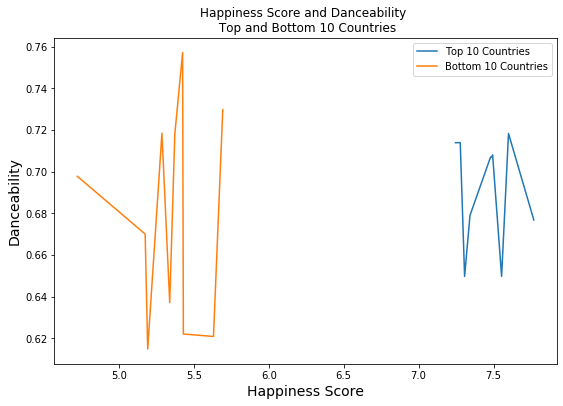

In [40]:
plt.figure(figsize=(9,6))
sns.lineplot(x="happiness_score",y="danceability",
             label="Top 10 Countries", data=topfinal,
             ci=None)

sns.lineplot(x="happiness_score",y="danceability",
             label="Bottom 10 Countries",
             data=botfinal,
             ci=None)

plt.xlabel("Happiness Score", size=14)
plt.ylabel("Danceability", size=14)
plt.title("Happiness Score and Danceability \n Top and Bottom 10 Countries")
plt.show()

### Happiness Score and Danceability
#### Graph Description Above & Interpretation
At a first glance, we observe no meaningful relationship between the top 10 countries and the bottom 10 countries as it relates to how danceable the songs these countries listen to are. However, there appears to be a notable trend for the top 10 countries in that the danceability score remains above 0.65 despite there being a decrease at ~7.3 and ~7.51. In comparing both top and bottom 10 countries, however, we cannot draw a truly significant relationship given that many countries from the bottom 10 have relatively high danceability scores – in particular at ~5.3 – as those danceability scores from the top 10 countries. 

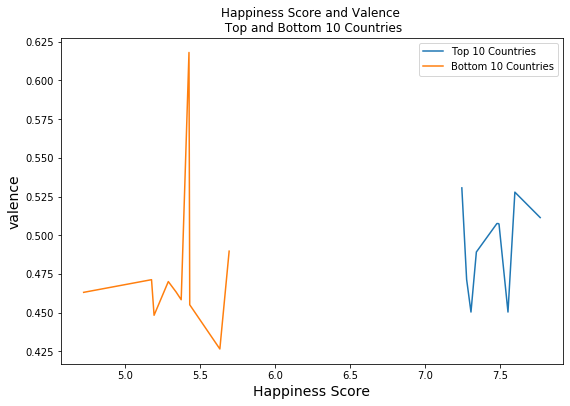

In [41]:
plt.figure(figsize=(9,6))
sns.lineplot(x="happiness_score",y="valence",
             label="Top 10 Countries", data=topfinal,
             ci=None)

sns.lineplot(x="happiness_score",y="valence",
             label="Bottom 10 Countries",
             data=botfinal,
             ci=None)

plt.xlabel("Happiness Score", size=14)
plt.ylabel("valence", size=14)
plt.title("Happiness Score and Valence \n Top and Bottom 10 Countries")
plt.show()

### Happiness Score and Valence
#### Graph Description & Interpretation
This graph represents the average valence score for the top and bottom 10 happiest countries. It becomes clear that the bottom 10 countries have a wider range of valence values compared to the top 10 countries. The range of the bottom 10 countries starts from as low as ~0.425 to as high as ~0.620 (a range of ~0.195). Conversely, the top countries' range starts at ~0.450 and only goes as high as ~0.527 ( a range of ~0.077). Most notably, there are considerably more countries – or possibly just one – with higher valence values than any of the top 10 countries. This may due to the presence of an outlier. 

In [42]:
topfinalrolling = topfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
topfinalrolling=topfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')

In [43]:
finalsongs2019.head()

,position,streams,date,url,track_name,artist,region,country,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,rank_x,happiness_rank,happiness_score
0,1,33717,2019-01-01,https://open.spotify.com/track/6MWtB6iiXyIwun0...,Wow.,Post Malone,fi,Finland,0.833,0.539,...,0.1630,0.000002,0.101,0.385,99.947,6MWtB6iiXyIwun0YzU6DFP,149520.0,0,1,7.769
1,2,29651,2019-01-01,https://open.spotify.com/track/25sgk305KZfyuqV...,Sweet but Psycho,Ava Max,fi,Finland,0.719,0.704,...,0.0691,0.000000,0.166,0.628,133.002,25sgk305KZfyuqVBQIahim,187436.0,0,1,7.769
2,3,28329,2019-01-01,https://open.spotify.com/track/4RYtaqxjDJUOY2G...,Harmaa Rinne,Teflon Brothers,fi,Finland,0.861,0.710,...,0.0410,0.000000,0.150,0.962,129.933,4RYtaqxjDJUOY2GrtkLTFf,170886.0,0,1,7.769
3,4,23977,2019-01-01,https://open.spotify.com/track/2rPE9A1vEgShuZx...,"thank u, next",Ariana Grande,fi,Finland,0.724,0.647,...,0.2800,0.000000,0.102,0.435,106.960,2rPE9A1vEgShuZxxzR2tZH,207333.0,0,1,7.769
4,5,22435,2019-01-01,https://open.spotify.com/track/00WO1oBxZcj9aBo...,Tavallinen,Keko Salata,fi,Finland,0.803,0.537,...,0.6730,0.000010,0.133,0.404,112.964,00WO1oBxZcj9aBoeiODXDx,231791.0,0,1,7.769


In [44]:
finalsongs2019=finalsongs2019.rename(columns={"rank_x":"rank"})

#### Description for Work Above
This is the part where we conduct our rolling average for our updated data frame **finalsongs2019**. In particular, we are using Portugal as an index position – given that this is the first of the bottom 10 countries – in order to consider our bottom and top final observations – or split, for the purpose of then grouping by country. We are conducting the rolling average of two weeks for danceability, which we are then merging on the country column.

In [45]:
rolling2=topfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()

#### Description for Work Above
We are performing the rolling average for two weeks for valence. 

In sum, we will have conducted the rolling average of two weeks for both danceability and valence, which we believe may best represent the overall "tune" – or how happy a song is – for a given country. 

*Note: We believe a rolling average is necessary here as it will allow us to understand potential trends with respect to the songs individuals in these countries listen to over the course of 14 days. With this in mind, we are making the assumption that **14 days** will be sufficient to generalize the musical trends over the course of one year – and therein, how happy the music the people of a country listen to. Furthermore, we are assuming the results of this window will allow us to gain more insight into the overall kind of music countries listen to, and how this relates to their happiness ranking as a country.*

In [46]:
topfinalrolling['valence']=rolling2['valence']

In [47]:
rolling2['danceability']=topfinalrolling['danceability']

In [48]:
topfinalrolling

,country,level_1,danceability,happiness_score,valence
0,Austria,163800,NaN,7.246,NaN
1,Austria,163801,NaN,7.246,NaN
2,Austria,163802,NaN,7.246,NaN
3,Austria,163803,NaN,7.246,NaN
4,Austria,163804,NaN,7.246,NaN
...,...,...,...,...,...
181995,Switzerland,109195,0.762643,7.480,0.539857
181996,Switzerland,109196,0.757500,7.480,0.513429
181997,Switzerland,109197,0.754071,7.480,0.526714
181998,Switzerland,109198,0.758000,7.480,0.529286


#### Description for Work Above
This new **topfinalrolling** will contain the rolling average of two weeks for **danceability** and **valence** for only the **top 10 countries.**

*Note: The first few observations for our rolling average will be NaN values given that these are the observations being taken to compute the very first rolling average*

In [49]:
botfinalrolling=botfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
botfinalrolling=botfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')

In [50]:
rolling3=botfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()

In [51]:
botfinalrolling['valence']=rolling3['valence']

In [52]:
rolling3['danceability']=botfinalrolling['danceability']

In [53]:
botfinalrolling

,country,level_1,danceability,happiness_score,valence
0,Dominican Republic,236600,NaN,5.425,NaN
1,Dominican Republic,236601,NaN,5.425,NaN
2,Dominican Republic,236602,NaN,5.425,NaN
3,Dominican Republic,236603,NaN,5.425,NaN
4,Dominican Republic,236604,NaN,5.425,NaN
...,...,...,...,...,...
181995,Vietnam,345795,0.679000,5.175,0.492686
181996,Vietnam,345796,0.686071,5.175,0.486614
181997,Vietnam,345797,0.680643,5.175,0.488043
181998,Vietnam,345798,0.659286,5.175,0.494614


#### Description for Work Above
We are now performing the rolling average for the bottom ten countries. We are still only focusing on danceability and valence. This information will now be saved in the variable name **botfinalrolling**.

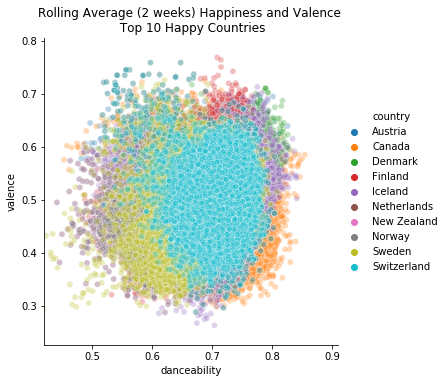

<Figure size 7200x3240 with 0 Axes>

In [54]:
scatter=sns.relplot(x="danceability", y="valence", hue="country", data=topfinalrolling, alpha=0.3)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.tight_layout
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.42,0.91))
plt.show()

#### Above Graph Description
This graph is illustrating our rolling average of two weeks for danceability and valence for the top 10 happiest countries, which can be seen on the right. This graph represents the mean of the rolling average for danceability and valence for the top 10 happiest countries.

*Interpretation*<p>For the purpose of our analysis, this means that our top 10 happiest countries listen to midly danceable music. With respect to valence, however, there appears to be a wider range of valence scores that are covered by the songs these top countries listen to. As such, this may be a fruitless metric in attempting to understand the music these top countries listen to. This would imply valence scores largely vary by song, contrary to danceability, which is more uniform.

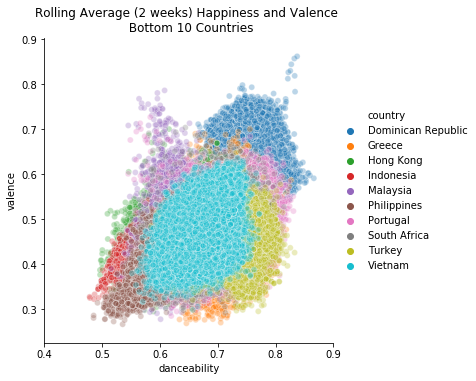

<Figure size 7200x3240 with 0 Axes>

In [55]:
scatter=sns.relplot(x='danceability', y='valence', hue='country', data=botfinalrolling, alpha=0.3)
plt.title("Rolling Average (2 weeks) Happiness and Valence \n Bottom 10 Countries")
plt.tight_layout
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.4,0.9))
plt.show()

#### Above Graph Description
This graph is illustrating our rolling average of two weeks for danceability and valence for the bottom 10 happiest countries, which can be seen on the right. 

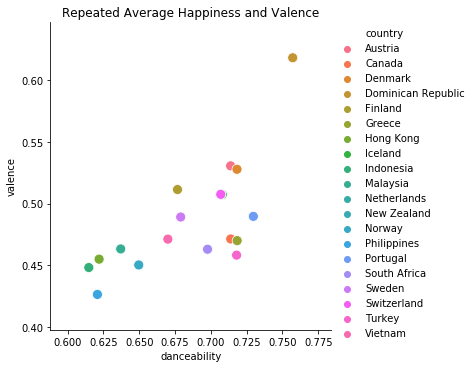

In [56]:
avg=finalsongs2019.groupby('country').mean()
scatter=sns.relplot(x='danceability', y='valence', hue=avg.index, data=avg, alpha=1.0, s=100)
#plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
# plt.legend(title='Rank', loc='best', labels=['Top', 'Bottom'])

plt.title("Repeated Average Happiness and Valence")
plt.show(scatter)

#### Above Graph Description
This graph is displaying our average danceability and valence for the top 10 and the bottom 10 happiest countries, which can be seen on the right. We decided to graph both the average danceability and average valence for each of the 20 countries to see if there was any pattern, and we have come to find a very subtle pattern. The bottom 10 countries have a slightly lower average score than that of the top 10 countries (e.g., Indonesia compared to Denmark), but this is not significant. It is important to point out the outlier of the Dominican Republic. Although the Dominican Republic is said to be one of the bottom 10 happiest countries, it has the highest average danceability and average valence score (average danceability score of about 0.755 and average valence score of about 0.63). We assume this has to do with outside factors, which may include  culture.

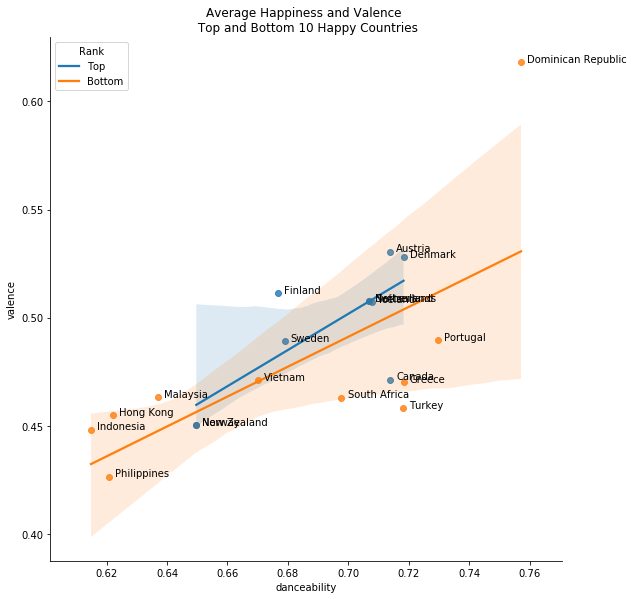

In [57]:
p1=sns.lmplot(x='danceability', y='valence', height=8,hue='rank',data=avg, legend=False)
plt.legend(title='Rank', loc='best', labels=['Top', 'Bottom'])
ax = p1.axes[0,0]

for line in range(0,avg.shape[0]):
     ax.text(avg.danceability[line]+0.002, avg.valence[line], 
     avg.index[line], horizontalalignment='left', 
     size='medium', color='black')
plt.title("Average Happiness and Valence \n Top and Bottom 10 Happy Countries")
plt.show()

*Note: There is an overlap of three countries at around <b>(0.71, 0.51)</b> including Iceland, Switzerland, and the Netherlands. These countries are not easily discernable in the graph. Similarly, there are two countries at around <b>(0.65, 0.45)</b>: New Zealand and Norway.*

#### Graph Description Above & Interpretation
<p> Contrary to our expectations, the top 10 happiest countries do not coincidentally have the highest danceability or valence scores. There appears to be a wide range of danceability and valence scores for all top and bottom countries, which may signify no notable relationship between the danceability and valence scores and the happiness scores of the top countries. We expected more tightly clustered results for both top and bottom happy countries. <p>
    
<p>It becomes clear, however, that there is a wider range of values for danceability and valence covered by the bottom 10 happiest countries, which makes sense given that these countries start at a lower danceability and valence score than the top 10 countries. Specifically, the danceability of the bottom countries begins at ~0.61, compared to ~0.66 for the top countries. Similarly, the valence score for the bottom countries begins at ~0.43, as opposed to ~0.45 for the top countries.<p>

<p> It is worth noting that the Dominican Republic is an outlier in this analysis given that it has the highest danceability and valence score despite being one of the bottom top countries (at number 14). It can be argued that the country contributes to "happy music" despite the country itself ranking pretty low in the happiness rank – likely due to political instability, or other non-music related factors. <p>
    
<p>As it pertains to our research question, the lower range of valence and danceability scores for the bottom 10 countries supports the fact less happier countries listen to music that is not as danceable or "happy," which is consistent with our hypothesis. The case of the Dominican Republic, however, raises an inconsistency in that a less happier country can still listen to far more danceable music by a significant margin. The fact that many of the bottom 10 countries rank in the same range of danceability and valence scores as the top countries make these results almost insignificant. By insignicant we mean dificult to say that there is any relationship between how happy a country is and the music the country listens to. Other features may nonetheless be at play – independent of danceability and valence – to still assess the signficance of music on a country's overall happiness rank.<p>

In [58]:
withoutdr=avg.drop(["Dominican Republic"],axis=0)

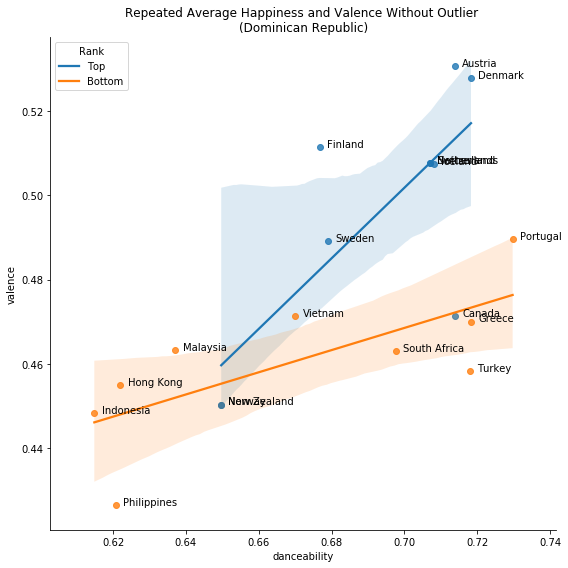

In [59]:
p2=sns.lmplot(x='danceability', y='valence', hue="rank",data=withoutdr, legend=False, height=8)
#plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.legend(title='Rank', loc='upper left', labels=['Top', 'Bottom'])
plt.title("Repeated Average Happiness and Valence Without Outlier \n(Dominican Republic)")

ax = p2.axes[0,0]

for line in range(0,withoutdr.shape[0]):
     ax.text(withoutdr.danceability[line]+0.002, withoutdr.valence[line], 
     withoutdr.index[line], horizontalalignment='left', 
     size='medium', color='black')
plt.tight_layout()
plt.show()

*Note: There is an overlap of three countries at around <b>(0.71, 0.51)</b> including Iceland, Switzerland, and the Netherlands. These countries are not easily discernable in the graph. Similarly, there are two countries at around <b>(0.65, 0.45)</b>: New Zealand and Norway.*

#### Graph Description Above
An outlier by definition lies an abnormal distance from other observations and escapes normality. Most importantly, it affects the direction of all observations in the data set by skewing it in a particular direction depending on how extreme – or distant – it is from the rest of the observations. With this in mind, we wanted to see the extent to which the line of best fit for the top countries would be impacted without the Dominican Republic (the outlier). 

**Interpretation**
<br>As can be seen, this line of best fit for the top countries became steeper without the Dominican Republic, asserting its influence on the rest of our observations. There is far clearer linear relationship for all the top countries, which seems to be far more removed from the rest of the bottom countries. We will evaluate this line of best fit by performing a linear regression model later in our analysis. Most notably, we also noticed the influence Canada had in the overall relationship for the top countries: the only top country in "bottom country" territory at ~0.72 danceability and ~0.47 valence besides New Zealand (which is merely the first top country with the lowest danceability and valence score).<br>

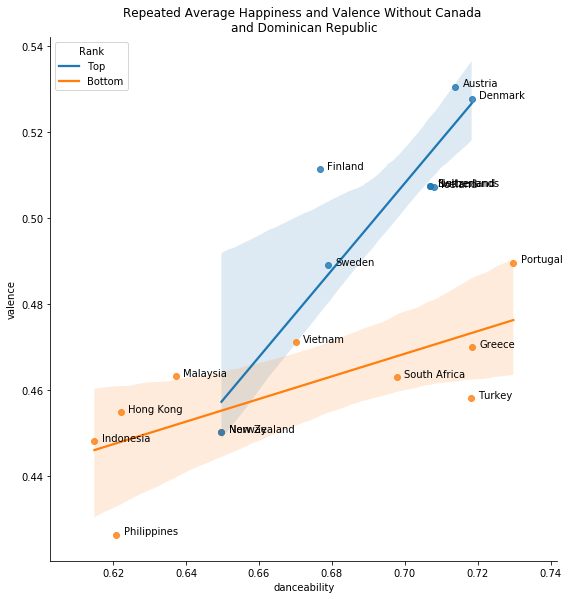

In [60]:
withoutca=avg.drop(["Dominican Republic","Canada"],axis=0)
p3=sns.lmplot(x='danceability', y='valence', hue="rank",data=withoutca, legend=False, height=8)
#plt.title("Rolling Average Mean (2 weeks) Happiness and Valence \n Top 10 Happy Countries")
plt.legend(title='Rank', loc='upper left', labels=['Top', 'Bottom'])
plt.title("Repeated Average Happiness and Valence Without Canada \nand Dominican Republic")


ax = p3.axes[0,0]

for line in range(0,withoutca.shape[0]):
     ax.text(withoutca.danceability[line]+0.002, withoutca.valence[line], 
     withoutca.index[line], horizontalalignment='left', 
     size='medium', color='black')
plt.show(p3)

*Note: There is an overlap of three countries at around <b>(0.71, 0.51)</b> including Iceland, Switzerland, and the Netherlands. These countries are not easily discernable in the graph. Similarly, there are two countries at around <b>(0.65, 0.45)</b>: New Zealand and Norway.*

#### Graph Description Above
This graph represents the repeated average happiness score for danceability and valence but with the Dominican Republic and Canada excluded. We decided to exclude Canada because of its abnormally, near-outlier position in the territory of the rest of the bottom countries. It should be noted that although Canada ranked relatively low for valence – which is partly what prompted us to exclude it from this graph – its danceability was relatively high, so its relevance as a top country is still noteworthy, albeit still in "bottom country" territory. As stated, we wanted to see the overall trend of all top countries without a country lagging behind the rest of the top countries.
<br><br>
**Interpretation**
<br>
As expected, the line of best fit for the top countries became steeper, further veering away from the bottom countries. It can be argued our hypothesis is confirmed by this graph since top countries (over 90%) tend to have significantly higher valence scores than bottom countries; however, we are skeptical about this conclusion given the similar range of danceability scores of both top and bottom countries. Further, it would be innacurate to say our hypothesis is confirmed simply because the average valence scores for the top countries are higher than the bottom countries. We will evaluate this trend later with a linear regression model. <br>

Now we are printing the original happy dataframe but with the average spotify audio feature score for their top daily songs in its own column. This will be useful for any computations or graphic we try and make later in the project.

####  Description for Work Above
We understand there were not many significant trends using rolling average for danceability and valence as it pertains to the top and bottom ten countries. Therefore, we will see which features show the highest correlation with happiness score and happiness rank and attempt to draw our following analysis from these results.

In [61]:
avg=avg.sort_values(["happiness_score"],ascending=False)

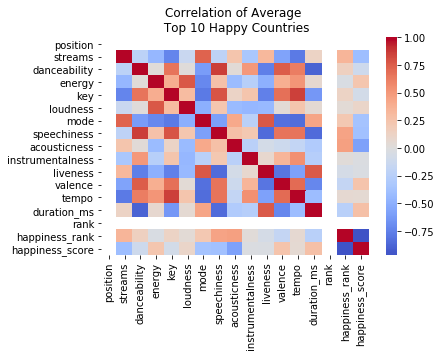

In [62]:
sns.heatmap(avg.head(10).corr(), center=0, cmap='coolwarm')
plt.title("Correlation of Average \n Top 10 Happy Countries")
plt.show()

#### Above Graph Description
*Interpretation*<p>In regards to interpreting this heatmap, the colors that are closest to red means that the correlation is positive, and the colors that are closest to blue means that the correlation is negative. The darker the shade of the color the stronger, the correlation is with the two features, and the lighter the shade of the color is, the weaker the correlation is because it is closest to the value of 0.0 (referring to the heatmap meter to the right). 

This graph represents the average of all of the features and its correlations with each other for the top 10 happiest countries. Additionally, it is also representative of the average for each feature and its correlation with the happiness score. When looking at the danceability's average score with the happiness score, you can see that there is a negative correlation that is not strong because the shade of the blue is very light. The same goes for valence, except it is a postive correlation because it is a light shade of red. According to the heatmap, the strongest correlation-- which also happens to be negative-- the happiness score of the top 10 happiest countries has is with the average acousticness, but the correlation is still weak. 

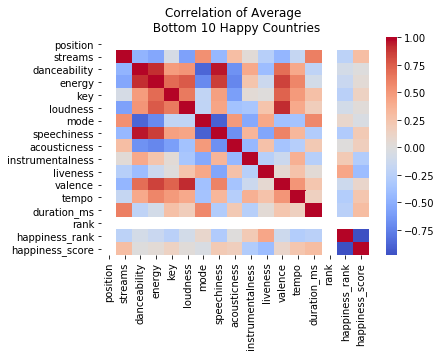

In [63]:
sns.heatmap(avg.tail(10).corr(), center=0, cmap='coolwarm')
plt.title("Correlation of Average \n Bottom 10 Happy Countries")
plt.show()

In [64]:
avg

,position,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,rank,happiness_rank,happiness_score
country,,,,,,,,,,,,,,,,,
Finland,25.5,27875.240879,0.676773,0.663020,5.129560,-6.368836,0.446484,0.092529,0.201814,0.009496,0.168731,0.511384,119.129309,199207.537033,0.0,1.0,7.769
Denmark,25.5,37138.216813,0.718297,0.608354,5.452143,-6.452041,0.455000,0.126762,0.236351,0.007709,0.152468,0.527824,118.132190,185525.915714,0.0,2.0,7.600
Norway,25.5,51152.837363,0.649706,0.615066,5.163022,-6.410190,0.560934,0.086827,0.245924,0.006461,0.180753,0.450321,117.200371,199537.145220,0.0,3.0,7.554
Iceland,25.5,3493.017747,0.708010,0.575703,5.475385,-7.531244,0.501923,0.114460,0.253068,0.015873,0.175444,0.507280,120.274468,191780.606703,0.0,4.0,7.494
Netherlands,25.5,19341.761813,0.706953,0.644965,5.645000,-6.113985,0.440879,0.141053,0.257389,0.007571,0.153108,0.507525,120.312466,191658.202582,0.0,5.0,7.488
Switzerland,25.5,19341.761813,0.706953,0.644965,5.645000,-6.113985,0.440879,0.141053,0.257389,0.007571,0.153108,0.507525,120.312466,191658.202582,0.0,6.0,7.480
Sweden,25.5,86689.723681,0.678985,0.591765,5.100659,-7.304039,0.587473,0.114049,0.295174,0.005917,0.167878,0.489140,116.597299,192077.504670,0.0,7.0,7.343
New Zealand,25.5,51152.837363,0.649706,0.615066,5.163022,-6.410190,0.560934,0.086827,0.245924,0.006461,0.180753,0.450321,117.200371,199537.145220,0.0,8.0,7.307
Canada,25.5,105777.108516,0.713905,0.594117,5.139505,-6.508806,0.545824,0.130653,0.240444,0.011077,0.169140,0.471375,117.942354,191437.583187,0.0,9.0,7.278


#### Above Graph Description
This graph represents the average of all of the features and its correlations with each other for the bottom 10 happiest countries. Additionally, it is also representative of the average for each feature and its correlation with the happiness score. When looking at the danceability's average score with the happiness score, you can see that there is a negative correlation that is not strong because the shade of the blue is very light, almost close to white which means that the correlation is close to 0.0 (no correlation). The same goes for valence, except it is a postive correlation because it is a light shade of red. According to the heatmap, the strongest correlation-- which also happens to be negative-- the happiness score of the bottom 10 happiest countries has is with the average liveness, but the correlation is still weak. 

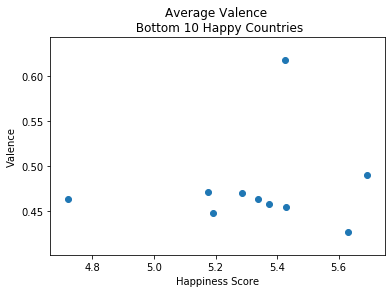

In [65]:
plt.scatter(avg.tail(10)['happiness_score'],avg.tail(10)['valence'])
plt.title("Average Valence \n Bottom 10 Happy Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Valence")
plt.show()

#### Above Graph Description
This graph is illustrating the average of valence for the bottom 10 happiest countries. This graph's purpose was to see if there were any physical trends of the average valence score for each of the bottom 10 happiest countries and the happiness score of that country. From the looks of it, there is not a hint of any relationship between these two features. However, there are some outliers present within the data of the average valence scores for the bottom 10 happiest countries (data points that are above 5.4 for the happiness score, below 5.0 for the happiness score, and above 0.60 for the valence score). 

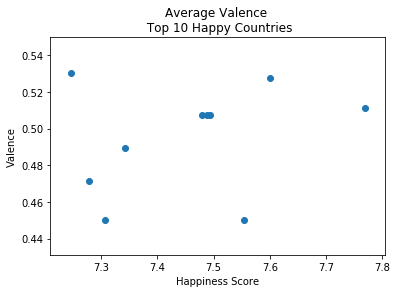

In [66]:
plt.scatter(avg.head(10)['happiness_score'],avg.head(10)['valence'])
plt.title("Average Valence \n Top 10 Happy Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Valence")
plt.show()

#### Above Graph Description
This graph shows the average of valence for the top 10 happiest countries. Similar to the previous graph, this graph's purpose was also to see if there were any physical trends of the average valence score for each of the top 10 happiest countries and the happiness score of that country. From the looks of it, there is not any form of a relationship between these two features. The data seems to be spread out across the graph. Some of the data points do, however, overlap with one another (countries with a hppiness score of around 7.4). 

In [67]:
happy2020=pd.read_csv('happiness2020.csv')
happy2020=happy2020[['Country name','Ladder score']]
happy2020['happiness_rank']=happy2020.index.copy()
happy2=happy2020.happiness_rank.to_numpy()
happy2=happy2+1
happy2020['happiness_rank']=happy2

In [68]:
cols2020= [x.lower() for x in happy2020.columns] 
cols2020= [x.replace(" ","_") for x in cols2020] 
happy2020.columns=cols2020

In [69]:
happy2020

,country_name,ladder_score,happiness_rank
0,Finland,7.8087,1
1,Denmark,7.6456,2
2,Switzerland,7.5599,3
3,Iceland,7.5045,4
4,Norway,7.4880,5
...,...,...,...
148,Central African Republic,3.4759,149
149,Rwanda,3.3123,150
150,Zimbabwe,3.2992,151
151,South Sudan,2.8166,152


# VIII Training a model to predict happiness scores in 2020 <a name="training"></a>
In a separate notebook, we scraped the top songs from 2020 per day per country from the Spotify charts website (this will be explained later). In short, we have a .csv file that is like the `finalsongs2017` dataframe but for 2020 song data. It contains the top 50 songs per day for the whole year for the top 10 and bot 10 happiest countries in 2020. These countries were identified using the Kaggle dataset for the 2020 happiness ranking.
We want to create a model from the 2017 data to predict the happiness scores of the songs in 2020, and we will compare the accuracy of these scores.

In [70]:
finalsongs2020=pd.read_csv("finalsongs2020.csv")

In [71]:
finalsongs2020.drop(["Unnamed: 0"], axis=1, inplace=True)

In [72]:
finalsongs2020.head()

,country,happiness_score,happiness_rank,date,position,track_name,artist,streams,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Finland,7.8087,1.0,2020-01-01,1,Hei rakas,BEHM,39681,0.680,0.411,...,-10.319,0.0,0.0282,0.43000,0.000002,0.1350,0.251,115.024,0tc8HGXosQDC8TTAaON1TP,211671.0
1,Finland,7.8087,1.0,2020-01-01,2,Pintakaasulla,JVG,31179,0.632,0.701,...,-7.157,0.0,0.1960,0.05680,0.000575,0.1080,0.443,129.290,3eHkFrUUGYuwEgIPRPtW9L,141581.0
2,Finland,7.8087,1.0,2020-01-01,3,Luota Muhun,ibe,30339,0.754,0.384,...,-11.040,1.0,0.0917,0.26400,0.000814,0.1180,0.842,167.089,4gEvvWYAF3yzv9hEY9f3oy,214175.0
3,Finland,7.8087,1.0,2020-01-01,4,Blinding Lights,The Weeknd,30208,0.513,0.796,...,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,0sf12qNH5qcw8qpgymFOqD,201573.0
4,Finland,7.8087,1.0,2020-01-01,5,Dance Monkey,Tones And I,28966,0.825,0.593,...,-6.401,0.0,0.0988,0.68800,0.000161,0.1700,0.540,98.078,1rgnBhdG2JDFTbYkYRZAku,209755.0


In [73]:
countries2020=happy2020.country_name
spotifycountries2020=pd.unique(finalsongs2020['country'])
happy2020=happy2020.loc[happy2020['country_name'].isin(spotifycountries2020)]
happy2020=happy2020.reset_index(drop=True)

In [74]:
#df with happiness ranking for 2020
happy2020

,country_name,ladder_score,happiness_rank
0,Finland,7.8087,1
1,Denmark,7.6456,2
2,Switzerland,7.5599,3
3,Iceland,7.5045,4
4,Norway,7.4880,5
5,Netherlands,7.4489,6
6,Sweden,7.3535,7
7,New Zealand,7.2996,8
8,Austria,7.2942,9
9,Canada,7.2321,11


In [75]:
#more cleaning and merging
happy2020.rename({"country_name":"country"}, axis="columns", inplace=True)
happy2020.rename({"ladder_score":"happiness_score"}, axis="columns", inplace=True)
spotify2020=happy2020.merge(finalsongs2020, on="country")
spotify2020

,country,happiness_score_x,happiness_rank_x,happiness_score_y,happiness_rank_y,date,position,track_name,artist,streams,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Finland,7.8087,1,7.8087,1.0,2020-01-01,1,Hei rakas,BEHM,39681,...,-10.319,0.0,0.0282,0.43000,0.000002,0.1350,0.251,115.024,0tc8HGXosQDC8TTAaON1TP,211671.0
1,Finland,7.8087,1,7.8087,1.0,2020-01-01,2,Pintakaasulla,JVG,31179,...,-7.157,0.0,0.1960,0.05680,0.000575,0.1080,0.443,129.290,3eHkFrUUGYuwEgIPRPtW9L,141581.0
2,Finland,7.8087,1,7.8087,1.0,2020-01-01,3,Luota Muhun,ibe,30339,...,-11.040,1.0,0.0917,0.26400,0.000814,0.1180,0.842,167.089,4gEvvWYAF3yzv9hEY9f3oy,214175.0
3,Finland,7.8087,1,7.8087,1.0,2020-01-01,4,Blinding Lights,The Weeknd,30208,...,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,0sf12qNH5qcw8qpgymFOqD,201573.0
4,Finland,7.8087,1,7.8087,1.0,2020-01-01,5,Dance Monkey,Tones And I,28966,...,-6.401,0.0,0.0988,0.68800,0.000161,0.1700,0.540,98.078,1rgnBhdG2JDFTbYkYRZAku,209755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364961,India,3.5733,144,3.5733,144.0,2020-12-30,45,Namo Namo,Amit Trivedi,78726,...,-3.711,1.0,0.3020,0.49200,0.000000,0.1530,0.813,177.867,3qrdLVOClRU4yPkcXZ7c5u,132158.0
364962,India,3.5733,144,3.5733,144.0,2020-12-30,46,Kalank (Title Track),Arijit Singh,78463,...,-1.294,1.0,0.0938,0.10100,0.003430,0.0598,0.494,94.993,5fXslGZPI5Cco6PKHzlSL3,188606.0
364963,India,3.5733,144,3.5733,144.0,2020-12-30,47,Keh Len De,"Kaka, Inder Chahal, Himanshi Khurana",78233,...,-2.572,1.0,0.0333,0.33200,0.000000,0.1250,0.712,123.962,1980E4Grgu5xAhNbFZ1mb1,195484.0
364964,India,3.5733,144,3.5733,144.0,2020-12-30,48,Pal Pal Dil Ke Paas- Title Track,"Arijit Singh, Parampara Tandon",76745,...,-5.180,0.0,0.0428,0.45000,0.000000,0.3190,0.345,171.843,1feANd8EfcDP5UqSvbheM3,371791.0


The following code is basically the same routine as the 2017 to get a dataframe with the audiofeatures of the Spotify 2020 songs. We have commented out the code because we saved the .csv file in our first time running it and now pd.read_csv rather than running the cells again

In [76]:
happy2020

,country,happiness_score,happiness_rank
0,Finland,7.8087,1
1,Denmark,7.6456,2
2,Switzerland,7.5599,3
3,Iceland,7.5045,4
4,Norway,7.4880,5
5,Netherlands,7.4489,6
6,Sweden,7.3535,7
7,New Zealand,7.2996,8
8,Austria,7.2942,9
9,Canada,7.2321,11


# Training Model

After seeing from our exploratory graphs that our top countries seemed to have higher valence scores slightly higher danceability scores, we believe that performing a training model would help cement whether or not this apparent relationship is just due to the data in 2019, or due to a significant relationship between audio features and happiness. While our graphs seemed to show some sort of relationship between happiness score, valence, and danceability, our heatmaps did not show a significant correlation between these two audio features and happiness score. Therefore, we decided to create a single-variable model for each audio feature and also a multivariable regression model that looked at all of these features. 

All of our models use our data from 2019 and then test it on our data from 2020. We chose to create both single-variable and multi-variable models in order to compare the accuracy of their predictions and see if one performed better than the other. It is important to note that we created a set of single- and multi-variable models that included data about our outlier, the DR, and then another set that excluded data from the DR. We weren't sure what the effect of an outlier would be on our model so we chose to compare the model in regards to this aspect as well.

### Single variable linear regression with outlier

In [77]:
newcol=['pred_danceability', 'pred_energy', 'pred_key',
       'pred_loudness', 'pred_mode', 'pred_speechiness', 'pred_acousticness', 'pred_instrumentalness',
       'pred_liveness', 'pred_valence', 'pred_tempo', 'pred_duration_ms']
index=0
coeff_determination=[]
predictions=pd.DataFrame()
for feature in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']:
    linear_model=lr()
    linear_model.fit(finalsongs2019[[feature]],finalsongs2019['happiness_score'])
    preds=linear_model.predict(finalsongs2020[['happiness_score']])
    
    predictions[newcol[index]]=preds
    index=index+1
    coeff_determination.append(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020['happiness_score']),2))
    
    print('Feature: '+feature)
    print('Regression slope of '+feature+' : '+str(round(linear_model.coef_[0],3)))
    print('r^2 of '+feature+' : '+str(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020.happiness_score),3))+'\n')

Feature: danceability
Regression slope of danceability : 0.373
r^2 of danceability : -0.151

Feature: energy
Regression slope of energy : 0.552
r^2 of energy : -0.168

Feature: key
Regression slope of key : -0.002
r^2 of key : -0.156

Feature: loudness
Regression slope of loudness : 0.017
r^2 of loudness : -0.154

Feature: mode
Regression slope of mode : -0.176
r^2 of mode : -0.159

Feature: speechiness
Regression slope of speechiness : 0.44
r^2 of speechiness : -0.154

Feature: acousticness
Regression slope of acousticness : -0.53
r^2 of acousticness : -0.144

Feature: instrumentalness
Regression slope of instrumentalness : -0.647
r^2 of instrumentalness : -0.156

Feature: liveness
Regression slope of liveness : 0.265
r^2 of liveness : -0.151

Feature: valence
Regression slope of valence : 0.257
r^2 of valence : -0.151

Feature: tempo
Regression slope of tempo : -0.0
r^2 of tempo : -0.156

Feature: duration_ms
Regression slope of duration_ms : -0.0
r^2 of duration_ms : -0.106



####  Description for Work Above
Here, we fit a linear regression model for each of the audio features we can obtain through the Spotify API. We first fit the model on our data from 2019 with the audio features forming the training set and the happiness score being the target variable. We then used this model to try and predict the happiness scores of countries based on their top song audio features from 2020. Above, we print the regression slope of each feature and the coefficient of determination for each model.

We also append the predicted happiness score to a dataframe named `Predictions` so we can later visually compare the accuracy of the predicitons in relation to the actual happiness score. 

In [78]:
predictions['country']=finalsongs2020['country']
predictions=predictions.merge(happy2020,on='country')
predictions.drop_duplicates(subset=["country"],inplace=True, ignore_index=True)
predictions.rename({"happiness_score":"obs_happiness_score"}, axis="columns", inplace=True)


first_column = predictions.pop('obs_happiness_score')
predictions.insert(0, 'obs_happiness_score', first_column)
first_column = predictions.pop('country')
predictions.insert(0, 'country', first_column)
predictions.drop(["happiness_rank"], axis=1, inplace=True)

####  Description for Work Above
The `Predictions`dataframe contains the true happiness scores of each country in the `obs_happiness_score` column. The other columns are the predicted happiness score based on the audiofeature. For example, `pred_danceability` is the predicted happiness scores for each country based on a country's danceability scores for their top songs.

In [79]:
predictions

,country,obs_happiness_score,pred_danceability,pred_energy,pred_key,pred_loudness,pred_mode,pred_speechiness,pred_acousticness,pred_instrumentalness,pred_liveness,pred_valence,pred_tempo,pred_duration_ms
0,Finland,7.8087,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
1,Denmark,7.6456,8.984134,10.273988,6.386071,6.639170,5.138869,9.704850,2.489578,1.450890,8.374162,8.232841,6.443475,7.044179
2,Switzerland,7.5599,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
3,Iceland,7.5045,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
4,Norway,7.4880,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
5,Netherlands,7.4489,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
6,Sweden,7.3535,8.875319,10.112827,6.386749,6.634102,5.190325,9.576331,2.644292,1.639914,8.296774,8.157711,6.443611,7.044180
7,New Zealand,7.2996,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178
8,Austria,7.2942,8.952208,10.226705,6.386270,6.637683,5.153966,9.667144,2.534970,1.506348,8.351457,8.210798,6.443515,7.044179
9,Canada,7.2321,9.044893,10.363976,6.385693,6.641999,5.110137,9.776612,2.403191,1.345344,8.417374,8.274791,6.443398,7.044178


In [80]:
coeff=pd.DataFrame(columns=['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms'], index=["Coefficient of Determination With Outlier"])
coeff.loc["Coefficient of Determination With Outlier"] = coeff_determination

In [81]:
coeff

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Coefficient of Determination With Outlier,-0.15,-0.17,-0.16,-0.15,-0.16,-0.15,-0.14,-0.16,-0.15,-0.15,-0.16,-0.11


####  Description for Work Above
We also saved the coefficient of determination for each model in its own dataframe so we can later compare the coefficient of determinations for the single-variable linear regression model that included the outlier and the model that excluded it. 

As you can see, the coefficient of detrmination for each feature is negative. The coefficient of determination basically quantifies how well the variance in happiness score can be explained by an audio feature. A negative coefficent of determination says that 1) the model is not doing a good job at explaining the variance and 2) that a horizontal line would fit better than the model does. Oddly`duration_ms` (the length of a song) has the highest coefficient of determination. However, this coefficient is still extremely small and doesn't mean that duration score is a predictor for a country's happiness score. Further, most songs are usually the same length so it wouldn't make sense if the length of a song is able to predict happiness score since happiness scores vary while duration does not. 

As we can see with these determination scores and the following graphs, the model we created for a single variable is not very accurate.

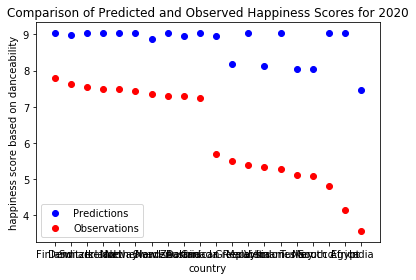

In [82]:
plt.scatter(predictions['country'],predictions['pred_danceability'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')
plt.xlabel('country')
plt.ylabel('happiness score based on danceability')
plt.tight_layout()

####  Description for Work Above

Here we graph the happiness scores that were predicted based on a song danceability scores. The dots in red represent the true happiness scores per country while the dots in blue represent the predicted happiness scores. 

We can see that the happiness scores were predicted to range between around 7.8 and 9 for both the top and bottom 10 countries. However, the true happiness scores range between around 3 and 8. Further, since we look at top and bottom 10 countries, there is a distinct split between the happiness scores for the top and bottom 10 countries. The predicted values do seem to decrease/vary a bit starting with the Dominican of Republic. However, overall this is not enough to say that danceability predicted the happiness scores well.

Text(0.5, 1, 'Comparison of Predicted and Observed Happiness Scores for 2020')

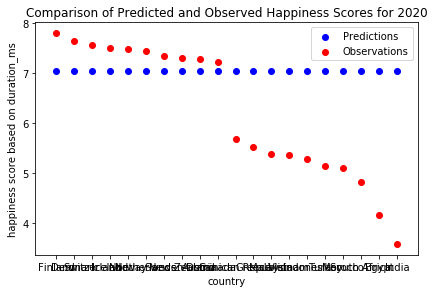

In [83]:
plt.scatter(predictions['country'],predictions['pred_duration_ms'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.xlabel('country')
plt.ylabel('happiness score based on duration_ms')
plt.tight_layout()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')

####  Description for Work Above
Since our duration model did seem to have the highest coefficient of determination, we decided to examine its predicted happiness scores in comparison to the true happiness scores. However, we can see that the predicted happiness scores form a linear line, likely due to the fact that the length of a song does not vary that much. The predicted happiness score is around 7 for every country. We see that duration is not a good predictor for a country's happiness score. 

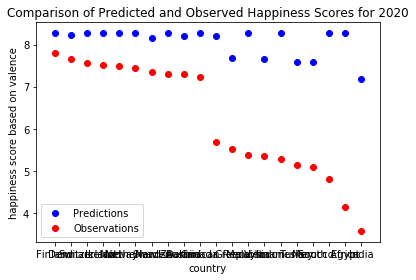

In [84]:
plt.scatter(predictions['country'],predictions['pred_valence'],c='blue', label='Predictions')
plt.scatter(predictions['country'],predictions['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')
plt.xlabel('country')
plt.ylabel('happiness score based on valence')
plt.tight_layout()

####  Description for Work Above

Here we graph the predicted happiness scores that were based on valence scores. This graph is very similar to our graph for danceability. The same conclusion can be reached; valence is not a good predictor of happiness and therefore there doesn't seem to be a relationship between valence and a country's happiness.

# Multivariable Linear Regression

We decided to also create a multivariable linear regression model to see if looking at multiple audio features, in comparison to individual audio features, would yield better predictions.

Multivariable Linear Regression with Outlier

In [85]:
multi_lin_model=lr()
multi_lin_model.fit(finalsongs2019[['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']],finalsongs2019['happiness_score'])

for x, feature in enumerate(['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']):
    print('{} coefficient: {:.2f}'.format(feature, multi_lin_model.coef_[x]))

print('r^2 of the model: '+str(round((multi_lin_model.score(finalsongs2019[['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']],finalsongs2019['happiness_score'])),2)))

danceability coefficient: -0.09
energy coefficient: 0.13
acousticness coefficient: -0.44
liveness coefficient: 0.20
valence coefficient: 0.08
tempo coefficient: -0.00
duration_ms coefficient: -0.00
r^2 of the model: 0.04


####  Description for Work Above
We created a multivariable linear regression model by fitting a model based on all of a song' audio features ('danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms'). Our target variable was again a country's happiness score. 

The model itself has a coefficient of determination of 0.04, which means that around 4% of the variation in happiness scores can be explained by a song's 'danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms' features. This is higher than any of the coefficients of determination we saw from the single variable regression models, however, the model hasn't been used to predict 2020 yet, which better implies whether the model is good or not. This is what we do next.

In [86]:
clist=pd.unique(finalsongs2020.country)
mult_pred_happy=[]
for country in clist:
    country_pred=finalsongs2020[finalsongs2020['country']==country]
    mean_scores=pd.DataFrame(country_pred.mean()).T
    mult_pred=multi_lin_model.predict(mean_scores[['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']])
    mult_pred_happy.append(mult_pred[0])
    coeffnum=round(multi_lin_model.score(finalsongs2020[['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']],finalsongs2020['happiness_score']),2)

In [87]:
coeffnum

-0.1

####  Description for Work Above
Here, we use the multivariable model that we created to predict the happiness scores for countries in 2020. The model has a coefficient of determination of -0.1. Again a negative coefficient of determination implies that the model is a poor fit for countries' actual happiness scores. However, a coefficient of determination of -0.1, while still negative, is better than any of the coefficients of determination for the single-variable regression models. 

In [88]:
multhap=pd.DataFrame()
multhap['country']=clist
multhap['pred_happiness_score']=mult_pred_happy
multhap['obs_happiness_score']=predictions['obs_happiness_score']

In [89]:
multhap

,country,pred_happiness_score,obs_happiness_score
0,Finland,6.459020,7.8087
1,Denmark,6.471942,7.6456
2,Switzerland,6.448441,7.5599
3,Iceland,6.422651,7.5045
4,Norway,6.425337,7.4880
5,Netherlands,6.448705,7.4489
6,Sweden,6.434503,7.3535
7,New Zealand,6.417562,7.2996
8,Austria,6.474695,7.2942
9,Canada,6.431671,7.2321


####  Description for Work Above
As we did with our `predictions` dataset, here we compiled the predicted happiness scores that were calculated using the model and the true happiness score for each country. This will help us visualize the discrepancies between the model's outputs and the correct outputs. 

Text(0, 0.5, 'happiness score based on energy, acousticness, liveness, valence, tempo, duration_ms')

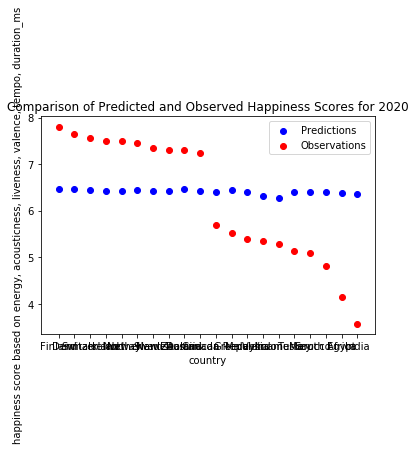

In [90]:
plt.scatter(multhap['country'],multhap['pred_happiness_score'],c='blue', label='Predictions')
plt.scatter(multhap['country'],multhap['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')
plt.xlabel('country')
plt.ylabel('happiness score based on energy, acousticness, liveness, valence, tempo, duration_ms')
# plt.tight_layout()

####  Description for Work Above
Above, we plot the happiness scores that our multivariable linear regression model predicts for countries in 2020. The predicted happiness scores are all around 6.4 and they seem to form a linear graph. However, again the predicted and actual observations are very different and emphasize that even with a multivariable graph, the relationship between songs and happiness score is not strong enough to create a model.

### Single-Variable Linear Regression Model without the Outlier

As we said before, we also wanted to create the single- and multivariable linear regression models with data that excluded the Dominican Republic since the DR did seem to be an outlier in terms of its valence score. Here we create the single-variable model is fitted on 2019 data that excludes the DR.

In [91]:
finalsongs2019nooutlier=finalsongs2019[finalsongs2019["country"]!="Dominican Republic"]
finalsongs2019nooutlier.reset_index(inplace=True, drop=True)

In [92]:
newcol=['pred_danceability', 'pred_energy', 'pred_key',
       'pred_loudness', 'pred_mode', 'pred_speechiness', 'pred_acousticness', 'pred_instrumentalness',
       'pred_liveness', 'pred_valence', 'pred_tempo', 'pred_duration_ms']
index=0
coeff_determination=[]
predictions=pd.DataFrame()
for feature in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']:
    linear_model=lr()
    linear_model.fit(finalsongs2019nooutlier[[feature]],finalsongs2019nooutlier['happiness_score'])
    preds=linear_model.predict(finalsongs2020[['happiness_score']])
    
    predictions[newcol[index]]=preds
    index=index+1
    coeff_determination.append(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020['happiness_score']),2))
    
    print('Feature: '+feature)
    print('Regression slope of '+feature+' : '+str(round(linear_model.coef_[0],3)))
    print('r^2 of '+feature+' : '+str(round(linear_model.score(finalsongs2020[[feature]],finalsongs2020.happiness_score),3))+'\n')

Feature: danceability
Regression slope of danceability : 0.585
r^2 of danceability : -0.12

Feature: energy
Regression slope of energy : 0.766
r^2 of energy : -0.144

Feature: key
Regression slope of key : 0.001
r^2 of key : -0.125

Feature: loudness
Regression slope of loudness : 0.034
r^2 of loudness : -0.123

Feature: mode
Regression slope of mode : -0.187
r^2 of mode : -0.131

Feature: speechiness
Regression slope of speechiness : 0.622
r^2 of speechiness : -0.124

Feature: acousticness
Regression slope of acousticness : -0.564
r^2 of acousticness : -0.114

Feature: instrumentalness
Regression slope of instrumentalness : -0.724
r^2 of instrumentalness : -0.126

Feature: liveness
Regression slope of liveness : 0.28
r^2 of liveness : -0.122

Feature: valence
Regression slope of valence : 0.441
r^2 of valence : -0.12

Feature: tempo
Regression slope of tempo : -0.0
r^2 of tempo : -0.126

Feature: duration_ms
Regression slope of duration_ms : -0.0
r^2 of duration_ms : -0.083



####  Description for Work Above
We fit the model on our data from 2019 and use the model to predict the happiness scores for 2020. We print the regression slope and the coefficient of determination for each model.

In [93]:
predictions['country']=finalsongs2020['country']
predictions=predictions.merge(happy2020,on='country')
predictions.drop_duplicates(subset=["country"],inplace=True, ignore_index=True)
predictions.rename({"happiness_score":"obs_happiness_score"}, axis="columns", inplace=True)


first_column = predictions.pop('obs_happiness_score')
predictions.insert(0, 'obs_happiness_score', first_column)
first_column = predictions.pop('country')
predictions.insert(0, 'country', first_column)
predictions.drop(["happiness_rank"], axis=1, inplace=True)

In [94]:
predictions

,country,obs_happiness_score,pred_danceability,pred_energy,pred_key,pred_loudness,pred_mode,pred_speechiness,pred_acousticness,pred_instrumentalness,pred_liveness,pred_valence,pred_tempo,pred_duration_ms
0,Finland,7.8087,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
1,Denmark,7.6456,10.513488,11.833907,6.444137,6.933653,5.111198,11.130172,2.289556,0.915941,8.537360,9.604031,6.460049,7.028887
2,Switzerland,7.5599,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
3,Iceland,7.5045,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
4,Norway,7.4880,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
5,Netherlands,7.4489,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
6,Sweden,7.3535,10.342717,11.610267,6.443885,6.923670,5.165884,10.948385,2.454239,1.127385,8.455588,9.475160,6.460096,7.028888
7,New Zealand,7.2996,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887
8,Austria,7.2942,10.463385,11.768293,6.444063,6.930724,5.127242,11.076837,2.337873,0.977977,8.513369,9.566221,6.460063,7.028888
9,Canada,7.2321,10.608841,11.958781,6.444277,6.939227,5.080662,11.231677,2.197601,0.797876,8.583020,9.675989,6.460023,7.028887


####  Description for Work Above
As we did when we fit single-variable linear regression models for the 2019 data with DR data included, we make another dataframe that compares the happiness scores that each single-variable model outputted. This will help us visually compare the model's predictions with the true happiness scores later. 

In [95]:
coeffwithoutoutlier=pd.DataFrame(columns=['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'duration_ms'], index=["Coefficient of Determination Without Outlier"])
coeffwithoutoutlier.loc["Coefficient of Determination Without Outlier"] = coeff_determination
coeff=coeff.append(coeffwithoutoutlier)

In [96]:
coeff

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Coefficient of Determination With Outlier,-0.15,-0.17,-0.16,-0.15,-0.16,-0.15,-0.14,-0.16,-0.15,-0.15,-0.16,-0.11
Coefficient of Determination Without Outlier,-0.12,-0.14,-0.13,-0.12,-0.13,-0.12,-0.11,-0.13,-0.12,-0.12,-0.13,-0.08


#### Description for Work Above
Above, we compare the coefficient of determination for all of the single-variable linear regression models. It appears that when we remove the Dominican Republic, our outlier, from the data used to train all the models, the coefficient of determination improves by 0.03 for each respect audio feature. However, all the coefficients of determination for each model are still negative, showing that removing the outlier did not improve the single-variable enough for it to now be significant.  

We will now see if this pattern continues for the multivariable models.

In [97]:
multi_lin_model=lr()
multi_lin_model.fit(finalsongs2019nooutlier[['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']],finalsongs2019nooutlier['happiness_score'])

for x, feature in enumerate(['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']):
    print('{} coefficient: {:.2f}'.format(feature, multi_lin_model.coef_[x]))

print('r^2 of the model: '+str(round((multi_lin_model.score(finalsongs2019nooutlier[['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']],finalsongs2019nooutlier['happiness_score'])),2)))

danceability coefficient: 0.09
energy coefficient: 0.31
acousticness coefficient: -0.38
liveness coefficient: 0.22
valence coefficient: 0.18
tempo coefficient: -0.00
duration_ms coefficient: -0.00
r^2 of the model: 0.04


#### Description for Work Above
We fit a multivariable linear regression for our 2019 data that excluded the Dominican Republic. This model has a coefficient of determination of 0.04, which means that around 4% of the variance in happiness scores in 2019 can be explained by a country's top songs, specifically the songs' danceability, energy, acousticness, liveness, valence, tempo, and duration. However, this is the score for the model when it predicts data in 2019. We want to know whether this model is able to predict the happiness scores for countries in a different year. 

Now we use the model to predict happiness scores in 2020.

In [98]:
clist=pd.unique(finalsongs2020.country)

mult_pred_happy=[]
for country in clist:
    country_pred=finalsongs2020[finalsongs2020['country']==country]
    mean_scores=pd.DataFrame(country_pred.mean()).T
    mult_pred=multi_lin_model.predict(mean_scores[['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']])
    mult_pred_happy.append(mult_pred[0])
    coeff=round(multi_lin_model.score(finalsongs2020[['danceability','energy', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']],finalsongs2020['happiness_score']),2)

In [99]:
coeff

-0.08

#### Description for Work Above
After running our multivariable model on the data from 2020, we get a coefficient of determination of -0.08. This is still a negative coefficient, meaning that this model does a very poor job at predicting a country's happiness scores. -0.08 is still somewhat higher than the coefficient of determinations for all of our single-variable models and our other multivariable model, however, as it is still a negative number it is not significant enough to say that there is a significant relationship between happiness scores and songs features.

In [100]:
multhap=pd.DataFrame()
multhap['country']=clist
multhap['pred_happiness_score']=mult_pred_happy
multhap['obs_happiness_score']=happy2020['happiness_score']
multhap

,country,pred_happiness_score,obs_happiness_score
0,Finland,6.512083,7.8087
1,Denmark,6.527850,7.6456
2,Switzerland,6.502163,7.5599
3,Iceland,6.466951,7.5045
4,Norway,6.463938,7.4880
5,Netherlands,6.499463,7.4489
6,Sweden,6.478648,7.3535
7,New Zealand,6.469855,7.2996
8,Austria,6.527385,7.2942
9,Canada,6.481272,7.2321


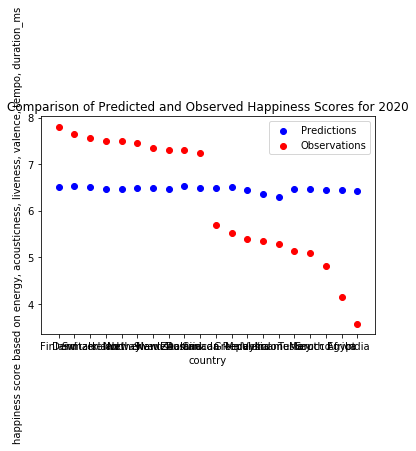

In [101]:
plt.scatter(multhap['country'],multhap['pred_happiness_score'],c='blue', label='Predictions')
plt.scatter(multhap['country'],multhap['obs_happiness_score'],c='red', label='Observations')
plt.legend()
plt.title('Comparison of Predicted and Observed Happiness Scores for 2020')
plt.xlabel('country')
plt.ylabel('happiness score based on energy, acousticness, liveness, valence, tempo, duration_ms')
plt.show()
#plt.tight_layout()

Just by looking at these graphs, there does not seem to be any clear relationship between the song features and the happiness score of a country. Though multiple regression seems to be a better predictor than single linear regression.

# IX Sources <a name="sources"></a>
**Source Code** <br>
GitHub  Repository: https://github.com/Albina-C/INFO-2950-Project 

**Appendix** <br>
[Exploratory Analysis](./Exploratory_analysis.ipynb)<br>
[Web-Scraping Notebook](./Dataset-Creation.ipynb)


**Acknowledgements** <br>
Spotipy: https://spotipy.readthedocs.io/en/2.18.0/ 
<br>
Cloudscraper: https://pypi.org/project/cloudscraper/ 
<br>
Web-Scraping Code Inspiration: https://gist.github.com/hktosun/d4f98488cb8f005214acd12296506f48 <br>
Harvard Medical School Study: https://www.health.harvard.edu/staying-healthy/music-and-health<br>
American Psychological Association Study (Hunter, et al): https://www.utm.utoronto.ca/~w3psygs/HunterEtAl2010.pdf

# Turn Up the Music! <a name="Turn-Up-the-Music!"></a>

Let's make a playlist of each country's happiest songs (according to valence)! We want you to be caught up with the music trends so let's use 2020 data. 

In [102]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid='c10b42de14134edfb7e9cafa42fc48a2'
secret='b41981d56a924e65a079138f9272e8de'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [103]:
groups=finalsongs2020.groupby("country")

In [104]:
max_urls=[]
min_urls=[]
for country, group in groups:
    max_valueid=group.valence.idxmax()
    max_urls.append(group.loc[max_valueid,'id'])
    min_valueid=group.valence.idxmin()
    min_urls.append(group.loc[min_valueid,'id'])

In [105]:
begin="https://open.spotify.com/track/"
maxu=[]
minu=[]
for url in range(len(max_urls)):
    maxu.append(begin+max_urls[url])
for url in range(len(min_urls)):
    minu.append(begin+min_urls[url])

In [106]:
maxu

['https://open.spotify.com/track/3qCeq0rWK67SoBDgFd2sId',
 'https://open.spotify.com/track/75nKBP8jQu681pTNCtrEnn',
 'https://open.spotify.com/track/75nKBP8jQu681pTNCtrEnn',
 'https://open.spotify.com/track/3pvVeJFCJO5N8gPhHjF268',
 'https://open.spotify.com/track/3y1tMUZAy2v5LMyKo7Ko8J',
 'https://open.spotify.com/track/2SNZVqgDiiuOUe2qPOW1m1',
 'https://open.spotify.com/track/3qCeq0rWK67SoBDgFd2sId',
 'https://open.spotify.com/track/75nKBP8jQu681pTNCtrEnn',
 'https://open.spotify.com/track/1IMsCuONQDaYYrgt4ehMbI',
 'https://open.spotify.com/track/1IMsCuONQDaYYrgt4ehMbI',
 'https://open.spotify.com/track/1IMsCuONQDaYYrgt4ehMbI',
 'https://open.spotify.com/track/7o9FUaPEWBuC2MlDJ6d4aQ',
 'https://open.spotify.com/track/0TrPmFDBPm81dRqHKTjB9O',
 'https://open.spotify.com/track/5xlS0QkVrSH7ssEbBgBzbM',
 'https://open.spotify.com/track/4OkHsgHOmGePTzQfsJGzJE',
 'https://open.spotify.com/track/3qCeq0rWK67SoBDgFd2sId',
 'https://open.spotify.com/track/3qCeq0rWK67SoBDgFd2sId',
 'https://open

In [107]:
minu

['https://open.spotify.com/track/73SpzrcaHk0RQPFP73vqVR',
 'https://open.spotify.com/track/3CJbxqRQ0JNCqboWDNUUeX',
 'https://open.spotify.com/track/4wVOKKEHUJxHCFFNUWDn0B',
 'https://open.spotify.com/track/09WAnxdBuebQopKhJT3oZS',
 'https://open.spotify.com/track/551xyaSJsg8hILXFq9JdST',
 'https://open.spotify.com/track/1XcNiBBAQlSUpxgzfXpeVv',
 'https://open.spotify.com/track/551xyaSJsg8hILXFq9JdST',
 'https://open.spotify.com/track/1UdiJ6Y2eisfQQ76MZOX4B',
 'https://open.spotify.com/track/73SpzrcaHk0RQPFP73vqVR',
 'https://open.spotify.com/track/3Nc86B5XmDlG1KuEeSLD8x',
 'https://open.spotify.com/track/3Nc86B5XmDlG1KuEeSLD8x',
 'https://open.spotify.com/track/551xyaSJsg8hILXFq9JdST',
 'https://open.spotify.com/track/4wVOKKEHUJxHCFFNUWDn0B',
 'https://open.spotify.com/track/4wVOKKEHUJxHCFFNUWDn0B',
 'https://open.spotify.com/track/73SpzrcaHk0RQPFP73vqVR',
 'https://open.spotify.com/track/551xyaSJsg8hILXFq9JdST',
 'https://open.spotify.com/track/4pdnPqZ6NOnofNfOOEO0iz',
 'https://open

<br>Link to Happy Playlist: https://open.spotify.com/playlist/2BrmDGLVRlD7r2Cf8culSw?si=50e8700bc810496f<br>
<br>Link to Sad Playlist: https://open.spotify.com/playlist/4ntdqpIQ5Eus34Ds9gDQNm?si=d4965381398e45e3<br>